In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [5]:
sns.set_style('dark', {'axes.grid':True, 'axes.edgecolor':'black', 'font.family':['serif'],'font.serif':['Roman'],
                       'xticks.bottom':True, 'ytick.left':True})

In [6]:
cwd = os.getcwd()
filename = cwd + '/winequality-red.csv'
data = pd.read_csv(filename)

In [7]:
print(data.keys())

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [8]:
# check if we have null values
print('Null values: ')
data.isnull().values.any()

Null values: 


False

In [9]:
values_counts=data['quality'].value_counts()
print("These are the observed values for " + 'quality' + ":")
print(values_counts)

These are the observed values for quality:
5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


In [10]:
# describe variables
data.loc[:, data.columns != 'quality'].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


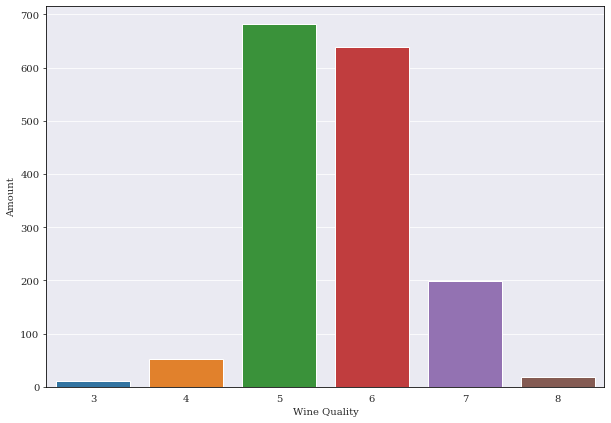

In [11]:
fig = plt.figure(figsize = (10,7))
sns.countplot(x = 'quality', data = data)
plt.xlabel('Wine Quality')
plt.ylabel('Amount')
plt.show()

In [22]:
review = []
for val in data['quality']:
    if (val <5 and val>2):
        review.append(0)
    if (val>4 and val<7):
        review.append(1)
    if (val>6):
        review.append(2)
data['review'] = review
data = data.drop(columns = ['quality'])

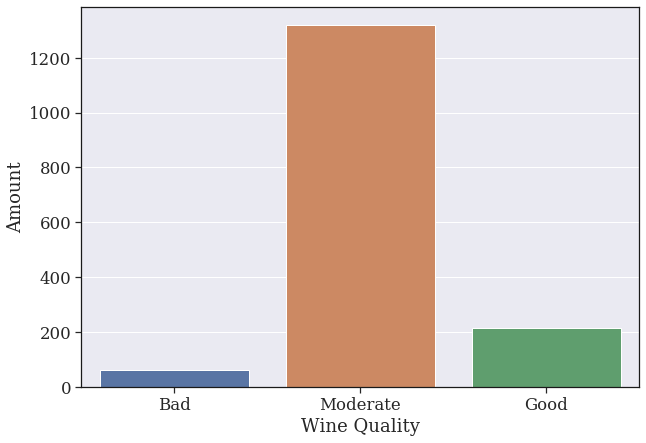

In [48]:
fig = plt.figure(figsize = (10,7))
sns.countplot(x = 'review', data = data)
plt.xlabel('Wine Quality')
plt.xticks((0,1,2),['Bad', 'Moderate', 'Good'])
plt.ylabel('Amount')
plt.show()

(12, 0)

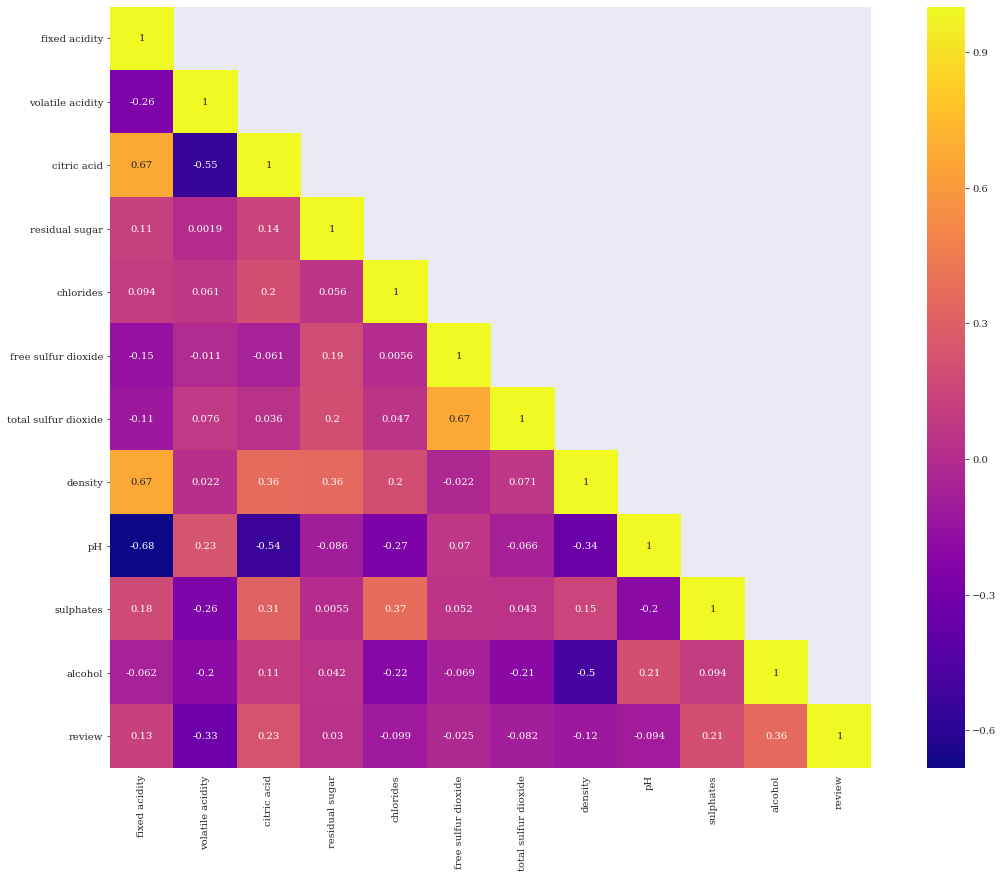

In [24]:
#corelation matrix.
cor_mat= data.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig, ax =plt.subplots(figsize = (20,14))
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True, cmap = 'plasma')
ax.set_ylim(12,0)


In [10]:
predictors = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide',
             'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

In [25]:
# test and training data
X_data = data.drop(columns = ['review'])
y_data = data.loc[:,'review']
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state = 1)



In [26]:
print('Percent of each score in the training data')
print(y_train.value_counts()/y_train.shape[0])

Percent of each score in the training data
1    0.817045
2    0.144644
0    0.038311
Name: review, dtype: float64


PC       % Variance
1        94.5396 
2        4.9213  
3        0.2805  
4        0.1574  
5        0.0935  
6        0.0036  
7        0.002   
8        0.001   
9        0.0009  
10       0.0001  
11       0.0     


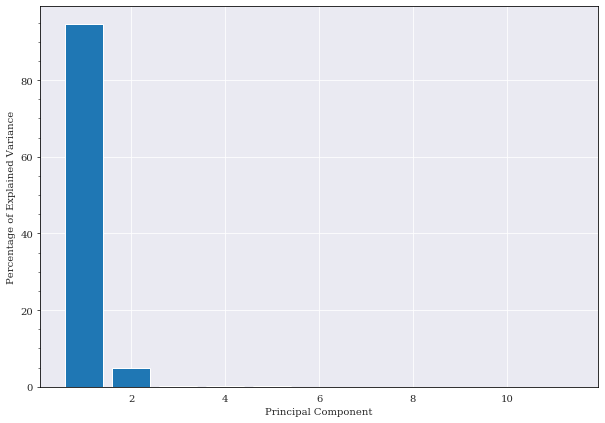

In [27]:
# PCA ANALYSIS
from sklearn.decomposition import PCA

pca100 = PCA()
pca100_X_train = pca100.fit_transform(X_train)
per_var = pca100.explained_variance_ratio_*100

fmt = '{:<8} {:<8}'
print(fmt.format('PC', '% Variance'))
for i in range(len(per_var)):
    print(fmt.format(i+1, np.round(per_var[i], decimals = 4)))

fig, ax = plt.subplots(figsize=(10,7))
sns.set(font_scale=1.5)
sns.set_style('dark',{'axes.edgecolor': '.1','xtick.bottom': True,'ytick.left': True,'axes.grid':True,
                      'grid.color':'white','font.family':['serif'],'font.serif':['serif']})
ax.bar(x=range(1,len(per_var)+1),height=per_var)
ax.set_ylabel("Percentage of Explained Variance")
ax.set_xlabel("Principal Component")
ax.minorticks_on()

In [28]:
# change to numpy
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [29]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [30]:
# one hot encoding
enc = OneHotEncoder(categories = 'auto')
y_train_hot = enc.fit_transform(y_train).toarray()
y_test_hot = enc.fit_transform(y_test).toarray()
print(y_train_hot[:10])
print(y_test_hot.shape)
print(X_train.shape)

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]]
(320, 3)
(1279, 11)


In [31]:
# Scale Data
trainScaler = StandardScaler()
trainScaler.fit(X_train)
X_train = trainScaler.transform(X_train)
X_test = trainScaler.transform(X_test)

In [32]:
print(y_train_hot.shape)

(1279, 3)


In [33]:
for i in range(y_train_hot.shape[0]):
    if np.sum(y_train_hot[i]) != 1:
        print(i)

Data now ready for analysis

# ANALYSIS

In [34]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

In [35]:
models = [RandomForestClassifier(random_state = 1), DecisionTreeClassifier(random_state = 1), 
          MLPClassifier(max_iter = 1000, random_state = 1), KNeighborsClassifier()]
model_names = ['Random Forest', 'Decision Tree', 'Neural Network', 'K-Neighbors']

In [36]:
acc = np.zeros_like(models)
for i in range(len(models)):
    solver = models[i]
    solver.fit(X_train, y_train_hot)
    predict = solver.predict(X_test)
    acc[i] = accuracy_score(predict, y_test_hot)
    print('{:<8} {:<8}'.format(model_names[i],acc[i]))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest 0.85625 
Decision Tree 0.815625
Neural Network 0.828125
K-Neighbors 0.846875


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# RANDOM FOREST

In [92]:
n_estimators = [int(x) for x in np.linspace(100, 2000, 20)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, 11)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth,
               'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

In [93]:
rf = RandomForestClassifier(random_state = 1)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 40, cv = 3, verbose=2, 
                               random_state=1, n_jobs = 1)
rf_random.fit(X_train, y_train_hot)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
[CV] n_estimators=1800, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=False 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1800, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=False, total=   3.5s
[CV] n_estimators=1800, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=False 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s remaining:    0.0s


[CV]  n_estimators=1800, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=False, total=   3.4s
[CV] n_estimators=1800, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=False 
[CV]  n_estimators=1800, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=False, total=   3.4s
[CV] n_estimators=1600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=1600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, total=   2.8s
[CV] n_estimators=1600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=1600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, total=   2.8s
[CV] n_estimators=1600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimator

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  3.5min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [96]:
rf_random.best_score_


0.8608287724784989

In [97]:
rf_random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 90,
 'bootstrap': True}

In [102]:
updated_params = {'n_estimators': [1400,1500,1600,1700], 'max_features':['auto'], 'max_depth': [80,85,90,95,100],
                  'min_samples_split': [2], 'min_samples_leaf': [1], 'bootstrap':[True]}

In [103]:
rf = RandomForestClassifier(random_state = 1)
rf_random = GridSearchCV(estimator = rf, param_grid = updated_params, cv = 3, verbose=2, scoring = 'accuracy',
                               n_jobs = 1)
rf_random.fit(X_train, y_train_hot)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1400 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1400, total=   2.6s
[CV] bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1400 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s


[CV]  bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1400, total=   2.5s
[CV] bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1400 
[CV]  bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1400, total=   2.6s
[CV] bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1500 
[CV]  bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1500, total=   2.8s
[CV] bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1500 
[CV]  bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1500, total=   2.7s
[CV] bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1500 
[CV]  bootstrap=True, max_de

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  3.0min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=1,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=1,
             param_grid={'boot

In [104]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1400}

In [105]:
rf_random.best_score_

0.8623924941360438

In [106]:
updated_params = {'n_estimators': [1200,1300,1400], 'max_features':['auto'], 'max_depth': [70,75,80],
                  'min_samples_split': [2], 'min_samples_leaf': [1], 'bootstrap':[True]}

In [107]:
rf = RandomForestClassifier(random_state = 1)
rf_grid = GridSearchCV(estimator = rf, param_grid = updated_params, cv = 3, verbose=2, scoring = 'accuracy',
                               n_jobs = 1)
rf_grid.fit(X_train, y_train_hot)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200, total=   2.3s
[CV] bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


[CV]  bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200, total=   2.3s
[CV] bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200 
[CV]  bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200, total=   2.3s
[CV] bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1300 
[CV]  bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1300, total=   2.5s
[CV] bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1300 
[CV]  bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1300, total=   2.4s
[CV] bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1300 
[CV]  bootstrap=True, max_de

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  1.1min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=1,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=1,
             param_grid={'boot

In [108]:
rf_grid.best_score_

0.8623924941360438

In [ ]:
0.8623924941360438

In [109]:
rf_grid.best_params_

{'bootstrap': True,
 'max_depth': 70,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1400}

In [110]:
updated_params = {'n_estimators': [1400], 'max_features':['auto'], 'max_depth': [50,60,70],
                  'min_samples_split': [2], 'min_samples_leaf': [1], 'bootstrap':[True]}

In [111]:
rf = RandomForestClassifier(random_state = 1)
rf_grid = GridSearchCV(estimator = rf, param_grid = updated_params, cv = 3, verbose=2, scoring = 'accuracy',
                               n_jobs = 1)
rf_grid.fit(X_train, y_train_hot)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1400 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1400, total=   2.6s
[CV] bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1400 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s


[CV]  bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1400, total=   2.5s
[CV] bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1400 
[CV]  bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1400, total=   2.6s
[CV] bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1400 
[CV]  bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1400, total=   2.6s
[CV] bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1400 
[CV]  bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1400, total=   2.5s
[CV] bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1400 
[CV]  bootstrap=True, max_de

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   23.6s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=1,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=1,
             param_grid={'boot

In [112]:
rf_grid.best_params_

{'bootstrap': True,
 'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1400}

In [113]:
rf_grid.best_score_

0.8623924941360438

In [ ]:
WOW great still stucks

In [151]:
best_rf = rf_grid.best_estimator_
best_rf.fit(X_train, y_train_hot)
score = best_rf.score(X_test, y_test_hot)
print(score)

0.875


# *NEural NET

In [61]:
random_grid = {'learning_rate_init':[1e-5,1e-3,1e-1],'alpha':[1e-3], 
               'hidden_layer_sizes':[(10,),(100,),(100,100),(100,100,100)], 'solver':['adam','sgd','lbfgs']}

In [62]:
NN = MLPClassifier(max_iter = 400, random_state = 1)
NN_random = RandomizedSearchCV(estimator = NN, param_distributions = random_grid, n_iter = 40, cv = 3, verbose=2, 
                               random_state=1, n_jobs = 1)
NN_random.fit(X_train, y_train_hot)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 36 is smaller than n_iter=40. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] solver=adam, learning_rate_init=1e-05, hidden_layer_sizes=(10,), alpha=0.001 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  solver=adam, learning_rate_init=1e-05, hidden_layer_sizes=(10,), alpha=0.001, total=   0.6s
[CV] solver=adam, learning_rate_init=1e-05, hidden_layer_sizes=(10,), alpha=0.001 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, learning_rate_init=1e-05, hidden_layer_sizes=(10,), alpha=0.001, total=   0.6s
[CV] solver=adam, learning_rate_init=1e-05, hidden_layer_sizes=(10,), alpha=0.001 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, learning_rate_init=1e-05, hidden_layer_sizes=(10,), alpha=0.001, total=   0.5s
[CV] solver=sgd, learning_rate_init=1e-05, hidden_layer_sizes=(10,), alpha=0.001 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, learning_rate_init=1e-05, hidden_layer_sizes=(10,), alpha=0.001, total=   0.5s
[CV] solver=sgd, learning_rate_init=1e-05, hidden_layer_sizes=(10,), alpha=0.001 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, learning_rate_init=1e-05, hidden_layer_sizes=(10,), alpha=0.001, total=   0.5s
[CV] solver=sgd, learning_rate_init=1e-05, hidden_layer_sizes=(10,), alpha=0.001 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, learning_rate_init=1e-05, hidden_layer_sizes=(10,), alpha=0.001, total=   0.5s
[CV] solver=lbfgs, learning_rate_init=1e-05, hidden_layer_sizes=(10,), alpha=0.001 
[CV]  solver=lbfgs, learning_rate_init=1e-05, hidden_layer_sizes=(10,), alpha=0.001, total=   0.2s
[CV] solver=lbfgs, learning_rate_init=1e-05, hidden_layer_sizes=(10,), alpha=0.001 
[CV]  solver=lbfgs, learning_rate_init=1e-05, hidden_layer_sizes=(10,), alpha=0.001, total=   0.2s
[CV] solver=lbfgs, learning_rate_init=1e-05, hidden_layer_sizes=(10,), alpha=0.001 
[CV]  solver=lbfgs, learning_rate_init=1e-05, hidden_layer_sizes=(10,), alpha=0.001, total=   0.2s
[CV] solver=adam, learning_rate_init=0.001, hidden_layer_sizes=(10,), alpha=0.001 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, learning_rate_init=0.001, hidden_layer_sizes=(10,), alpha=0.001, total=   0.5s
[CV] solver=adam, learning_rate_init=0.001, hidden_layer_sizes=(10,), alpha=0.001 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, learning_rate_init=0.001, hidden_layer_sizes=(10,), alpha=0.001, total=   0.5s
[CV] solver=adam, learning_rate_init=0.001, hidden_layer_sizes=(10,), alpha=0.001 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, learning_rate_init=0.001, hidden_layer_sizes=(10,), alpha=0.001, total=   0.6s
[CV] solver=sgd, learning_rate_init=0.001, hidden_layer_sizes=(10,), alpha=0.001 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, learning_rate_init=0.001, hidden_layer_sizes=(10,), alpha=0.001, total=   0.5s
[CV] solver=sgd, learning_rate_init=0.001, hidden_layer_sizes=(10,), alpha=0.001 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, learning_rate_init=0.001, hidden_layer_sizes=(10,), alpha=0.001, total=   0.5s
[CV] solver=sgd, learning_rate_init=0.001, hidden_layer_sizes=(10,), alpha=0.001 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, learning_rate_init=0.001, hidden_layer_sizes=(10,), alpha=0.001, total=   0.5s
[CV] solver=lbfgs, learning_rate_init=0.001, hidden_layer_sizes=(10,), alpha=0.001 
[CV]  solver=lbfgs, learning_rate_init=0.001, hidden_layer_sizes=(10,), alpha=0.001, total=   0.2s
[CV] solver=lbfgs, learning_rate_init=0.001, hidden_layer_sizes=(10,), alpha=0.001 
[CV]  solver=lbfgs, learning_rate_init=0.001, hidden_layer_sizes=(10,), alpha=0.001, total=   0.2s
[CV] solver=lbfgs, learning_rate_init=0.001, hidden_layer_sizes=(10,), alpha=0.001 
[CV]  solver=lbfgs, learning_rate_init=0.001, hidden_layer_sizes=(10,), alpha=0.001, total=   0.2s
[CV] solver=adam, learning_rate_init=0.1, hidden_layer_sizes=(10,), alpha=0.001 
[CV]  solver=adam, learning_rate_init=0.1, hidden_layer_sizes=(10,), alpha=0.001, total=   0.1s
[CV] solver=adam, learning_rate_init=0.1, hidden_layer_sizes=(10,), alpha=0.001 
[CV]  solver=adam, learning_rate_init=0.1, hidden_layer_sizes=(10,), alpha=0.001, total=   0.1s


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, learning_rate_init=1e-05, hidden_layer_sizes=(100,), alpha=0.001, total=   1.1s
[CV] solver=adam, learning_rate_init=1e-05, hidden_layer_sizes=(100,), alpha=0.001 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, learning_rate_init=1e-05, hidden_layer_sizes=(100,), alpha=0.001, total=   1.0s
[CV] solver=adam, learning_rate_init=1e-05, hidden_layer_sizes=(100,), alpha=0.001 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, learning_rate_init=1e-05, hidden_layer_sizes=(100,), alpha=0.001, total=   1.0s
[CV] solver=sgd, learning_rate_init=1e-05, hidden_layer_sizes=(100,), alpha=0.001 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, learning_rate_init=1e-05, hidden_layer_sizes=(100,), alpha=0.001, total=   1.0s
[CV] solver=sgd, learning_rate_init=1e-05, hidden_layer_sizes=(100,), alpha=0.001 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, learning_rate_init=1e-05, hidden_layer_sizes=(100,), alpha=0.001, total=   0.9s
[CV] solver=sgd, learning_rate_init=1e-05, hidden_layer_sizes=(100,), alpha=0.001 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, learning_rate_init=1e-05, hidden_layer_sizes=(100,), alpha=0.001, total=   0.9s
[CV] solver=lbfgs, learning_rate_init=1e-05, hidden_layer_sizes=(100,), alpha=0.001 
[CV]  solver=lbfgs, learning_rate_init=1e-05, hidden_layer_sizes=(100,), alpha=0.001, total=   0.3s
[CV] solver=lbfgs, learning_rate_init=1e-05, hidden_layer_sizes=(100,), alpha=0.001 
[CV]  solver=lbfgs, learning_rate_init=1e-05, hidden_layer_sizes=(100,), alpha=0.001, total=   0.3s
[CV] solver=lbfgs, learning_rate_init=1e-05, hidden_layer_sizes=(100,), alpha=0.001 
[CV]  solver=lbfgs, learning_rate_init=1e-05, hidden_layer_sizes=(100,), alpha=0.001, total=   0.2s
[CV] solver=adam, learning_rate_init=0.001, hidden_layer_sizes=(100,), alpha=0.001 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, learning_rate_init=0.001, hidden_layer_sizes=(100,), alpha=0.001, total=   1.0s
[CV] solver=adam, learning_rate_init=0.001, hidden_layer_sizes=(100,), alpha=0.001 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, learning_rate_init=0.001, hidden_layer_sizes=(100,), alpha=0.001, total=   1.0s
[CV] solver=adam, learning_rate_init=0.001, hidden_layer_sizes=(100,), alpha=0.001 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, learning_rate_init=0.001, hidden_layer_sizes=(100,), alpha=0.001, total=   1.0s
[CV] solver=sgd, learning_rate_init=0.001, hidden_layer_sizes=(100,), alpha=0.001 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, learning_rate_init=0.001, hidden_layer_sizes=(100,), alpha=0.001, total=   0.9s
[CV] solver=sgd, learning_rate_init=0.001, hidden_layer_sizes=(100,), alpha=0.001 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, learning_rate_init=0.001, hidden_layer_sizes=(100,), alpha=0.001, total=   0.9s
[CV] solver=sgd, learning_rate_init=0.001, hidden_layer_sizes=(100,), alpha=0.001 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, learning_rate_init=0.001, hidden_layer_sizes=(100,), alpha=0.001, total=   0.9s
[CV] solver=lbfgs, learning_rate_init=0.001, hidden_layer_sizes=(100,), alpha=0.001 
[CV]  solver=lbfgs, learning_rate_init=0.001, hidden_layer_sizes=(100,), alpha=0.001, total=   0.3s
[CV] solver=lbfgs, learning_rate_init=0.001, hidden_layer_sizes=(100,), alpha=0.001 
[CV]  solver=lbfgs, learning_rate_init=0.001, hidden_layer_sizes=(100,), alpha=0.001, total=   0.3s
[CV] solver=lbfgs, learning_rate_init=0.001, hidden_layer_sizes=(100,), alpha=0.001 
[CV]  solver=lbfgs, learning_rate_init=0.001, hidden_layer_sizes=(100,), alpha=0.001, total=   0.2s
[CV] solver=adam, learning_rate_init=0.1, hidden_layer_sizes=(100,), alpha=0.001 
[CV]  solver=adam, learning_rate_init=0.1, hidden_layer_sizes=(100,), alpha=0.001, total=   0.1s
[CV] solver=adam, learning_rate_init=0.1, hidden_layer_sizes=(100,), alpha=0.001 
[CV]  solver=adam, learning_rate_init=0.1, hidden_layer_sizes=(100,), alpha=0.001, tot

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, learning_rate_init=1e-05, hidden_layer_sizes=(100, 100), alpha=0.001, total=   2.1s
[CV] solver=adam, learning_rate_init=1e-05, hidden_layer_sizes=(100, 100), alpha=0.001 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, learning_rate_init=1e-05, hidden_layer_sizes=(100, 100), alpha=0.001, total=   2.0s
[CV] solver=adam, learning_rate_init=1e-05, hidden_layer_sizes=(100, 100), alpha=0.001 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, learning_rate_init=1e-05, hidden_layer_sizes=(100, 100), alpha=0.001, total=   2.1s
[CV] solver=sgd, learning_rate_init=1e-05, hidden_layer_sizes=(100, 100), alpha=0.001 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, learning_rate_init=1e-05, hidden_layer_sizes=(100, 100), alpha=0.001, total=   1.9s
[CV] solver=sgd, learning_rate_init=1e-05, hidden_layer_sizes=(100, 100), alpha=0.001 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, learning_rate_init=1e-05, hidden_layer_sizes=(100, 100), alpha=0.001, total=   1.9s
[CV] solver=sgd, learning_rate_init=1e-05, hidden_layer_sizes=(100, 100), alpha=0.001 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, learning_rate_init=1e-05, hidden_layer_sizes=(100, 100), alpha=0.001, total=   1.9s
[CV] solver=lbfgs, learning_rate_init=1e-05, hidden_layer_sizes=(100, 100), alpha=0.001 
[CV]  solver=lbfgs, learning_rate_init=1e-05, hidden_layer_sizes=(100, 100), alpha=0.001, total=   0.5s
[CV] solver=lbfgs, learning_rate_init=1e-05, hidden_layer_sizes=(100, 100), alpha=0.001 
[CV]  solver=lbfgs, learning_rate_init=1e-05, hidden_layer_sizes=(100, 100), alpha=0.001, total=   0.5s
[CV] solver=lbfgs, learning_rate_init=1e-05, hidden_layer_sizes=(100, 100), alpha=0.001 
[CV]  solver=lbfgs, learning_rate_init=1e-05, hidden_layer_sizes=(100, 100), alpha=0.001, total=   0.5s
[CV] solver=adam, learning_rate_init=0.001, hidden_layer_sizes=(100, 100), alpha=0.001 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, learning_rate_init=0.001, hidden_layer_sizes=(100, 100), alpha=0.001, total=   2.1s
[CV] solver=adam, learning_rate_init=0.001, hidden_layer_sizes=(100, 100), alpha=0.001 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, learning_rate_init=0.001, hidden_layer_sizes=(100, 100), alpha=0.001, total=   2.2s
[CV] solver=adam, learning_rate_init=0.001, hidden_layer_sizes=(100, 100), alpha=0.001 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, learning_rate_init=0.001, hidden_layer_sizes=(100, 100), alpha=0.001, total=   2.1s
[CV] solver=sgd, learning_rate_init=0.001, hidden_layer_sizes=(100, 100), alpha=0.001 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, learning_rate_init=0.001, hidden_layer_sizes=(100, 100), alpha=0.001, total=   1.9s
[CV] solver=sgd, learning_rate_init=0.001, hidden_layer_sizes=(100, 100), alpha=0.001 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, learning_rate_init=0.001, hidden_layer_sizes=(100, 100), alpha=0.001, total=   1.9s
[CV] solver=sgd, learning_rate_init=0.001, hidden_layer_sizes=(100, 100), alpha=0.001 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, learning_rate_init=0.001, hidden_layer_sizes=(100, 100), alpha=0.001, total=   2.0s
[CV] solver=lbfgs, learning_rate_init=0.001, hidden_layer_sizes=(100, 100), alpha=0.001 
[CV]  solver=lbfgs, learning_rate_init=0.001, hidden_layer_sizes=(100, 100), alpha=0.001, total=   0.5s
[CV] solver=lbfgs, learning_rate_init=0.001, hidden_layer_sizes=(100, 100), alpha=0.001 
[CV]  solver=lbfgs, learning_rate_init=0.001, hidden_layer_sizes=(100, 100), alpha=0.001, total=   0.6s
[CV] solver=lbfgs, learning_rate_init=0.001, hidden_layer_sizes=(100, 100), alpha=0.001 
[CV]  solver=lbfgs, learning_rate_init=0.001, hidden_layer_sizes=(100, 100), alpha=0.001, total=   0.6s
[CV] solver=adam, learning_rate_init=0.1, hidden_layer_sizes=(100, 100), alpha=0.001 
[CV]  solver=adam, learning_rate_init=0.1, hidden_layer_sizes=(100, 100), alpha=0.001, total=   0.2s
[CV] solver=adam, learning_rate_init=0.1, hidden_layer_sizes=(100, 100), alpha=0.001 
[CV]  solver=adam, learning_rate_init=0.1, hid

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, learning_rate_init=1e-05, hidden_layer_sizes=(100, 100, 100), alpha=0.001, total=   3.2s
[CV] solver=adam, learning_rate_init=1e-05, hidden_layer_sizes=(100, 100, 100), alpha=0.001 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, learning_rate_init=1e-05, hidden_layer_sizes=(100, 100, 100), alpha=0.001, total=   3.6s
[CV] solver=adam, learning_rate_init=1e-05, hidden_layer_sizes=(100, 100, 100), alpha=0.001 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=adam, learning_rate_init=1e-05, hidden_layer_sizes=(100, 100, 100), alpha=0.001, total=   3.3s
[CV] solver=sgd, learning_rate_init=1e-05, hidden_layer_sizes=(100, 100, 100), alpha=0.001 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, learning_rate_init=1e-05, hidden_layer_sizes=(100, 100, 100), alpha=0.001, total=   2.9s
[CV] solver=sgd, learning_rate_init=1e-05, hidden_layer_sizes=(100, 100, 100), alpha=0.001 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, learning_rate_init=1e-05, hidden_layer_sizes=(100, 100, 100), alpha=0.001, total=   3.0s
[CV] solver=sgd, learning_rate_init=1e-05, hidden_layer_sizes=(100, 100, 100), alpha=0.001 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, learning_rate_init=1e-05, hidden_layer_sizes=(100, 100, 100), alpha=0.001, total=   3.0s
[CV] solver=lbfgs, learning_rate_init=1e-05, hidden_layer_sizes=(100, 100, 100), alpha=0.001 
[CV]  solver=lbfgs, learning_rate_init=1e-05, hidden_layer_sizes=(100, 100, 100), alpha=0.001, total=   0.7s
[CV] solver=lbfgs, learning_rate_init=1e-05, hidden_layer_sizes=(100, 100, 100), alpha=0.001 
[CV]  solver=lbfgs, learning_rate_init=1e-05, hidden_layer_sizes=(100, 100, 100), alpha=0.001, total=   0.8s
[CV] solver=lbfgs, learning_rate_init=1e-05, hidden_layer_sizes=(100, 100, 100), alpha=0.001 
[CV]  solver=lbfgs, learning_rate_init=1e-05, hidden_layer_sizes=(100, 100, 100), alpha=0.001, total=   0.7s
[CV] solver=adam, learning_rate_init=0.001, hidden_layer_sizes=(100, 100, 100), alpha=0.001 
[CV]  solver=adam, learning_rate_init=0.001, hidden_layer_sizes=(100, 100, 100), alpha=0.001, total=   1.8s
[CV] solver=adam, learning_rate_init=0.001, hidden_layer_sizes=(100, 100, 100), alp

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, learning_rate_init=0.001, hidden_layer_sizes=(100, 100, 100), alpha=0.001, total=   2.9s
[CV] solver=sgd, learning_rate_init=0.001, hidden_layer_sizes=(100, 100, 100), alpha=0.001 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, learning_rate_init=0.001, hidden_layer_sizes=(100, 100, 100), alpha=0.001, total=   2.8s
[CV] solver=sgd, learning_rate_init=0.001, hidden_layer_sizes=(100, 100, 100), alpha=0.001 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  solver=sgd, learning_rate_init=0.001, hidden_layer_sizes=(100, 100, 100), alpha=0.001, total=   2.8s
[CV] solver=lbfgs, learning_rate_init=0.001, hidden_layer_sizes=(100, 100, 100), alpha=0.001 
[CV]  solver=lbfgs, learning_rate_init=0.001, hidden_layer_sizes=(100, 100, 100), alpha=0.001, total=   0.7s
[CV] solver=lbfgs, learning_rate_init=0.001, hidden_layer_sizes=(100, 100, 100), alpha=0.001 
[CV]  solver=lbfgs, learning_rate_init=0.001, hidden_layer_sizes=(100, 100, 100), alpha=0.001, total=   0.8s
[CV] solver=lbfgs, learning_rate_init=0.001, hidden_layer_sizes=(100, 100, 100), alpha=0.001 
[CV]  solver=lbfgs, learning_rate_init=0.001, hidden_layer_sizes=(100, 100, 100), alpha=0.001, total=   0.7s
[CV] solver=adam, learning_rate_init=0.1, hidden_layer_sizes=(100, 100, 100), alpha=0.001 
[CV]  solver=adam, learning_rate_init=0.1, hidden_layer_sizes=(100, 100, 100), alpha=0.001, total=   0.4s
[CV] solver=adam, learning_rate_init=0.1, hidden_layer_sizes=(100, 100, 100), alpha=0.0

[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:  1.7min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                           batch_size='auto', beta_1=0.9,
                                           beta_2=0.999, early_stopping=False,
                                           epsilon=1e-08,
                                           hidden_layer_sizes=(100,),
                                           learning_rate='constant',
                                           learning_rate_init=0.001,
                                           max_iter=400, momentum=0.9,
                                           n_iter_no_change=10,
                                           nesterovs_momentum=True, power_t=0.5,
                                           rand...
                                           validation_fraction=0.1,
                                           verbose=False, warm_start=False),
                   iid='warn', n_it

In [63]:
NN_random.best_score_

0.8295543393275997

In [64]:
NN_random.best_params_


{'solver': 'adam',
 'learning_rate_init': 0.001,
 'hidden_layer_sizes': (100, 100, 100),
 'alpha': 0.001}

In [65]:
params1 = {'hidden_layer_sizes':[(100,100,100),(200,200,200),(200,100,50),(300,100,30)], 'solver':['adam'],
           'learning_rate_init':[0.001], 'alpha':[0.001]}

In [72]:
NN = MLPClassifier(max_iter = 10000, random_state = 1)
NN_grid = GridSearchCV(estimator = NN, param_grid = params1, cv = 3, verbose=2, scoring = 'accuracy',
                       n_jobs = 1)
NN_grid.fit(X_train, y_train_hot)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=adam 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=adam, total=   1.8s
[CV] alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=adam 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV]  alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=adam, total=   1.4s
[CV] alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=adam 
[CV]  alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=adam, total=   2.1s
[CV] alpha=0.001, hidden_layer_sizes=(200, 200, 200), learning_rate_init=0.001, solver=adam 
[CV]  alpha=0.001, hidden_layer_sizes=(200, 200, 200), learning_rate_init=0.001, solver=adam, total=   2.9s
[CV] alpha=0.001, hidden_layer_sizes=(200, 200, 200), learning_rate_init=0.001, solver=adam 
[CV]  alpha=0.001, hidden_layer_sizes=(200, 200, 200), learning_rate_init=0.001, solver=adam, total=   1.5s
[CV] alpha=0.001, hidden_layer_sizes=(200, 200, 200), learning_rate_init=0.001, solver=adam 
[CV]  alpha=0.001, hidden_layer_sizes=(200, 200, 200), learning_rate_init=0.001, solver=adam, total=   3.1s
[CV] alpha=0.001, hidden_layer_sizes=(200, 100, 50), learning_rate_init=0.001, solver=ad

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   27.1s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=10000,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_s...e=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=1,
             param_grid={'alpha': [0.001],
                         'hidden_layer

In [73]:
NN_grid.best_score_

0.8295543393275997

In [74]:
NN_grid.best_params_

{'alpha': 0.001,
 'hidden_layer_sizes': (100, 100, 100),
 'learning_rate_init': 0.001,
 'solver': 'adam'}

In [75]:
params1 = {'hidden_layer_sizes':[(100,100,100)], 'solver':['adam'],
           'learning_rate_init':[1e-5,1e-4,1e-3,1e-2,1e-1], 'alpha':[0.001]}

In [76]:
NN = MLPClassifier(max_iter = 10000, random_state = 1)
NN_grid = GridSearchCV(estimator = NN, param_grid = params1, cv = 3, verbose=2, scoring = 'accuracy',
                       n_jobs = 1)
NN_grid.fit(X_train, y_train_hot)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=1e-05, solver=adam 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=1e-05, solver=adam, total=  13.6s
[CV] alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=1e-05, solver=adam 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.6s remaining:    0.0s


[CV]  alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=1e-05, solver=adam, total=  15.4s
[CV] alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=1e-05, solver=adam 
[CV]  alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=1e-05, solver=adam, total=  16.6s
[CV] alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001, solver=adam 
[CV]  alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001, solver=adam, total=  12.7s
[CV] alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001, solver=adam 
[CV]  alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001, solver=adam, total=  11.9s
[CV] alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001, solver=adam 
[CV]  alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001, solver=adam, total=  12.5s
[CV] alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, so

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  1.5min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=10000,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=1, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=1,
             param_grid={'alpha': [0.001],
                         'h

In [77]:
NN_grid.best_score_

0.8295543393275997

In [78]:
NN_grid.best_params_

{'alpha': 0.001,
 'hidden_layer_sizes': (100, 100, 100),
 'learning_rate_init': 0.001,
 'solver': 'adam'}

In [81]:
params1 = {'hidden_layer_sizes':[(100,100,100)], 'solver':['adam'],
           'activation':['relu', 'logistic', 'tanh'], 'alpha':[0.001], 'learning_rate_init':[0.001]}

In [82]:
NN = MLPClassifier(max_iter = 10000, random_state = 1)
NN_grid = GridSearchCV(estimator = NN, param_grid = params1, cv = 3, verbose=2, scoring = 'accuracy',
                       n_jobs = 1)
NN_grid.fit(X_train, y_train_hot)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=adam 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=adam, total=   1.8s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=adam 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=adam, total=   1.5s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=adam, total=   2.2s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=adam 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=adam, total=   2.8s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=adam 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=adam, total=   3.4s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=adam 
[CV]  activation=logistic, alpha=0.001, 

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   27.0s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=10000,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_s...e=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=1,
             param_grid={'activation': ['relu', 'logistic', 'tanh'],
            

In [83]:
NN_grid.best_score_

0.8389366692728695

In [84]:
NN_grid.best_params_

{'activation': 'logistic',
 'alpha': 0.001,
 'hidden_layer_sizes': (100, 100, 100),
 'learning_rate_init': 0.001,
 'solver': 'adam'}

In [85]:
params1 = {'hidden_layer_sizes':[(100,100,100),(200,200,200),(300,300,300)], 'solver':['adam'],
           'activation':['logistic'], 'alpha':[0.001], 'learning_rate_init':[0.001]}

In [86]:
NN = MLPClassifier(max_iter = 10000, random_state = 1)
NN_grid = GridSearchCV(estimator = NN, param_grid = params1, cv = 3, verbose=2, scoring = 'accuracy',
                       n_jobs = 1)
NN_grid.fit(X_train, y_train_hot)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=adam 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=adam, total=   2.7s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=adam 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=adam, total=   3.1s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=adam 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=adam, total=   3.2s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(200, 200, 200), learning_rate_init=0.001, solver=adam 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(200, 200, 200), learning_rate_init=0.001, solver=adam, total=   2.8s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(200, 200, 200), learning_rate_init=0.001, solver=adam 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(200, 200, 200), learning_rate_init=0.001, solver=adam, total=   3.0s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(200, 200, 200), learning_rate_init=0.001, solver=adam 
[CV]  activation=logistic, a

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   34.2s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=10000,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_s...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=1,
             param_grid={'activation': ['logistic'], 'alpha': [0.001],
                 

In [87]:
NN_grid.best_score_

0.8389366692728695

In [88]:
NN_grid.best_params_

{'activation': 'logistic',
 'alpha': 0.001,
 'hidden_layer_sizes': (100, 100, 100),
 'learning_rate_init': 0.001,
 'solver': 'adam'}

In [91]:
print(NN_grid.cv_results_)

{'mean_fit_time': array([2.95404069, 2.97600881, 5.46327345]), 'std_fit_time': array([0.21644589, 0.11671821, 0.24179969]), 'mean_score_time': array([0.00290656, 0.00487296, 0.00715558]), 'std_score_time': array([0.00012973, 0.00011286, 0.00014951]), 'param_activation': masked_array(data=['logistic', 'logistic', 'logistic'],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'param_alpha': masked_array(data=[0.001, 0.001, 0.001],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'param_hidden_layer_sizes': masked_array(data=[(100, 100, 100), (200, 200, 200), (300, 300, 300)],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'param_learning_rate_init': masked_array(data=[0.001, 0.001, 0.001],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'param_solver': masked_array(data=['adam', 'adam', 'adam'],
             mask=[False,

In [150]:
best_NN = NN_grid.best_estimator_
best_NN.fit(X_train, y_train_hot)
score = best_NN.score(X_test, y_test_hot)
print(score)

0.85


# Decisoins Tree

In [123]:
grid = {'criterion':['gini','entropy'], 'max_depth':np.linspace(10,100,10)}

In [125]:
tree = DecisionTreeClassifier(random_state=1)
tree_grid = GridSearchCV(estimator = tree, param_grid = grid, scoring = 'accuracy', cv = 3, verbose=2, 
                               n_jobs = 1)
tree_grid.fit(X_train, y_train_hot)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] criterion=gini, max_depth=10.0 ..................................
[CV] ................... criterion=gini, max_depth=10.0, total=   0.0s
[CV] criterion=gini, max_depth=10.0 ..................................
[CV] ................... criterion=gini, max_depth=10.0, total=   0.0s
[CV] criterion=gini, max_depth=10.0 ..................................
[CV] ................... criterion=gini, max_depth=10.0, total=   0.0s
[CV] criterion=gini, max_depth=20.0 ..................................
[CV] ................... criterion=gini, max_depth=20.0, total=   0.0s
[CV] criterion=gini, max_depth=20.0 ..................................
[CV] ................... criterion=gini, max_depth=20.0, total=   0.0s
[CV] criterion=gini, max_depth=20.0 ..................................
[CV] ................... criterion=gini, max_depth=20.0, total=   0.0s
[CV] criterion=gini, max_depth=30.0 ..................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................... criterion=gini, max_depth=90.0, total=   0.0s
[CV] criterion=gini, max_depth=100.0 .................................
[CV] .................. criterion=gini, max_depth=100.0, total=   0.0s
[CV] criterion=gini, max_depth=100.0 .................................
[CV] .................. criterion=gini, max_depth=100.0, total=   0.0s
[CV] criterion=gini, max_depth=100.0 .................................
[CV] .................. criterion=gini, max_depth=100.0, total=   0.0s
[CV] criterion=entropy, max_depth=10.0 ...............................
[CV] ................ criterion=entropy, max_depth=10.0, total=   0.0s
[CV] criterion=entropy, max_depth=10.0 ...............................
[CV] ................ criterion=entropy, max_depth=10.0, total=   0.0s
[CV] criterion=entropy, max_depth=10.0 ...............................
[CV] ................ criterion=entropy, max_depth=10.0, total=   0.0s
[CV] criterion=entropy, max_depth=20.0 ...............................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.5s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=1,
                                              splitter='best'),
             iid='warn', n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 10.,  20.,  30.,  40.,  50.,  60.,  7

In [126]:
tree_random.best_score_

0.8201720093823299

In [127]:
tree_random.best_params_

{'max_depth': 10.0, 'criterion': 'gini'}

In [138]:
grid = {'criterion':['gini','entropy'], 'max_depth':np.linspace(1,10,10), 'max_features':[2,4,6,8,11],
        'max_leaf_nodes':[2,5,10,15]}
tree = DecisionTreeClassifier(random_state=1)
tree_grid = GridSearchCV(estimator = tree, param_grid = grid, scoring = 'accuracy', cv = 3, verbose=2, 
                               n_jobs = 1)
tree_fit = tree_grid.fit(X_train, y_train_hot)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits
[CV] criterion=gini, max_depth=1.0, max_features=2, max_leaf_nodes=2 .
[CV]  criterion=gini, max_depth=1.0, max_features=2, max_leaf_nodes=2, total=   0.0s
[CV] criterion=gini, max_depth=1.0, max_features=2, max_leaf_nodes=2 .
[CV]  criterion=gini, max_depth=1.0, max_features=2, max_leaf_nodes=2, total=   0.0s
[CV] criterion=gini, max_depth=1.0, max_features=2, max_leaf_nodes=2 .
[CV]  criterion=gini, max_depth=1.0, max_features=2, max_leaf_nodes=2, total=   0.0s
[CV] criterion=gini, max_depth=1.0, max_features=2, max_leaf_nodes=5 .
[CV]  criterion=gini, max_depth=1.0, max_features=2, max_leaf_nodes=5, total=   0.0s
[CV] criterion=gini, max_depth=1.0, max_features=2, max_leaf_nodes=5 .
[CV]  criterion=gini, max_depth=1.0, max_features=2, max_leaf_nodes=5, total=   0.0s
[CV] criterion=gini, max_depth=1.0, max_features=2, max_leaf_nodes=5 .
[CV]  criterion=gini, max_depth=1.0, max_features=2, max_leaf_nodes=5, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=gini, max_depth=1.0, max_features=11, max_leaf_nodes=10, total=   0.0s
[CV] criterion=gini, max_depth=1.0, max_features=11, max_leaf_nodes=10 
[CV]  criterion=gini, max_depth=1.0, max_features=11, max_leaf_nodes=10, total=   0.0s
[CV] criterion=gini, max_depth=1.0, max_features=11, max_leaf_nodes=15 
[CV]  criterion=gini, max_depth=1.0, max_features=11, max_leaf_nodes=15, total=   0.0s
[CV] criterion=gini, max_depth=1.0, max_features=11, max_leaf_nodes=15 
[CV]  criterion=gini, max_depth=1.0, max_features=11, max_leaf_nodes=15, total=   0.0s
[CV] criterion=gini, max_depth=1.0, max_features=11, max_leaf_nodes=15 
[CV]  criterion=gini, max_depth=1.0, max_features=11, max_leaf_nodes=15, total=   0.0s
[CV] criterion=gini, max_depth=2.0, max_features=2, max_leaf_nodes=2 .
[CV]  criterion=gini, max_depth=2.0, max_features=2, max_leaf_nodes=2, total=   0.0s
[CV] criterion=gini, max_depth=2.0, max_features=2, max_leaf_nodes=2 .
[CV]  criterion=gini, max_depth=2.0, max_features=

[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    4.0s finished


In [139]:
tree_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 4.0,
 'max_features': 11,
 'max_leaf_nodes': 10}

In [146]:
tree_grid.best_score_
best_tree = tree_grid.best_estimator_

In [149]:
best_tree.fit(X_train, y_train_hot)
score = best_tree.score(X_test, y_test_hot)
print(score)

0.825


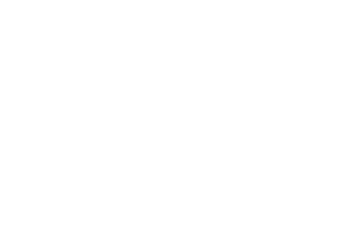

In [145]:
from sklearn import tree
%matplotlib inline
clf = tree_grid.best_estimator_
plotstuff = clf.fit(X_train, y_train_hot)

tree.plot_tree(plotstuff)
plt.show()

In [105]:
for i in range(y_train_hot.shape[0]):
    if np.sum(y_train_hot[i]) != 1:
        print(i, 'nice')

In [45]:
NN = MLPClassifier(hidden_layer_sizes=(30,10,10), activation='relu', solver='adam', batch_size = 100, 
                   max_iter=1000, alpha=0.001, learning_rate = 'constant', learning_rate_init = 0.0001, 
                   random_state = 1)
NN.out_activation_ = 'softmax'
NN.fit(X_train, y_train_hot)
pred = NN.predict(X_test)
print(pred.shape[0])
prob = NN.predict_proba(X_test)
sklearn_score = NN.score(X_test, y_test_hot)

prediction = np.zeros_like(prob)
idx = np.argmax(prob, axis = 1)
for i in range(prediction.shape[0]):
    prediction[i,idx[i]]=1
score = accuracy_score(y_test_hot, prediction)
print('accuracy_score ', score)
print('sklearn_score ', sklearn_score)
count = 0
for i in range(pred.shape[0]):
    if not np.array_equal(pred[i], y_test_hot[i]):
        count += 1
print('my accuracy ', (pred.shape[0]-count)/pred.shape[0])




320
accuracy_score  0.8375
sklearn_score  0.81875
my accuracy  0.81875


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [140]:
# just checking 
kf = KFold(n_splits = 5, shuffle = True, random_state = 1)
accuracy = 0
for tr_idx, val_idx in kf.split(X_train):          
    NN = MLPClassifier(hidden_layer_sizes=(10,10,10), activation='relu', solver='lbfgs', batch_size = 100, 
                       max_iter=10, alpha=0.001, learning_rate = 'constant', random_state = 1)
    
    NN.fit(X_train[tr_idx], y_train[tr_idx])
    prediction = NN.predict(X_train[val_idx])
    print(prediction[:10])
    score = NN.score(X_train[val_idx],y_train[val_idx])
    accuracy += score
    
accuracy = accuracy/5
print(accuracy)

[[0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 

In [136]:
eta_vec = np.logspace(-5, 1, 7)
lam_vec = np.logspace(-5, 1, 7)
test_accuracy_NN_sklearn = np.zeros((len(eta_vec), len(lam_vec)))

for i, eta in enumerate(eta_vec):
    for j, lam in enumerate(lam_vec):
        kf = KFold(n_splits = 5, shuffle = True, random_state = 1)
        accuracy = 0
        for tr_idx, val_idx in kf.split(X_train):          
            NN = MLPClassifier(hidden_layer_sizes=(10,10), activation='relu', solver='lbfgs', batch_size = 100, 
                               max_iter=10, alpha=lam, learning_rate_init=eta, random_state = 1)
            NN.fit(X_train[tr_idx], y_train[tr_idx,0])
            score = NN.score(X_train[val_idx],y_train[val_idx,0])
            accuracy += score
        accuracy = accuracy/5
        test_accuracy_NN_sklearn[i][j] = accuracy


In [128]:
print(5*np.logspace(-5, -1, 5))
print(np.logspace(-5,-1,5))


[5.e-05 5.e-04 5.e-03 5.e-02 5.e-01]
[1.e-05 1.e-04 1.e-03 1.e-02 1.e-01]
